# **Minicurso Introdução à Computação Quântica - UESB**

## Soluções dos hands on

In [1]:
# Para uma melhor visualização dos circuitos
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


In [2]:
# Instalando o Qiskit

!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


# Para criar um circuito é necessário importar algumas bibliotecas:


```
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer
import pylatexenc
```



In [3]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram # caso deseje plotar histogramas
from qiskit.visualization import circuit_drawer # Usado para visualizar circuito de forma mais bonita
import pylatexenc # para usar o matplotdrawer 
#criacao do circuito quantico com 1 qubit e 1 registrador clássico
qc = QuantumCircuit( 'quantidade de qubits', 'quantidade de registradores clássicos')

qc.'porta que deseja aplicar'('qubit onde a porta será aplicada')

qc.measure_all() #Mede o estado do qubit e armazena o resultado no registrador clássico.

qc.measure('qubit','registrador clássico') # É possível realizar a medição dessa forma também

#utilizando o QASM Simulator
backend = BasicProvider().get_backend("basic_simulator") # Define um simulador quântico (basic_simulator do BasicProvider).
# Caso deseje uma quantidade específica de execuções:
result = backend.run(qc, shots=2048).result()

result = backend.run(qc).result() # Executa o circuito e obtém o resultado da simulação
counts = result.get_counts() # O resultado é armazenado na variável counts, que contém a contagem dos estados medidos (quantas vezes o resultado foi 0 ou 1).

print(counts)
qc.draw() # Desenha o circuito quântico de forma visual.


SyntaxError: invalid syntax (117485183.py, line 9)

### Solução - 1
Implemente a porta X em um qubit inicialmente no estado ∣0⟩ e meça o resultado.

In [ ]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer
import pylatexenc

#criacao do circuito quantico com 1 qubit e 1 registrador clássico
qc = QuantumCircuit(1, 1)
qc.x(0) #aplicando a porta Pauli-X ao qubit
qc.measure(0,0)

#utilizando o QASM Simulator
backend = BasicProvider().get_backend("basic_simulator")
result = backend.run(qc).result()
counts = result.get_counts()
print(counts)
#qc.draw()
circuit_drawer(qc, output="mpl", style={"backgroundcolor": "#EEEEEE"})

### Solução - 2
Agora, implemente a porta X novamente, mas desta vez atuando em um qubit previamente preparado no estado ∣1⟩. Meça o resultado.


In [ ]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer
import pylatexenc

# Criando um circuito com 1 qubit e 1 registrador clássico
qc = QuantumCircuit(1, 1)

qc.x(0)  # Prepara o qubit no estado |1⟩
qc.x(0)  # Aplica a porta X novamente (volta para |0⟩)
#qc.measure_all()  # Mede o qubit
qc.measure(0,0)
# Utilizando o simulador
backend = BasicProvider().get_backend("basic_simulator")
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()

print(counts)  # Mostra os resultados da medição
#qc.draw()
circuit_drawer(qc, output="mpl", style={"backgroundcolor": "#EEEEEE"})

### Solução - 3
Aplique a porta H em um qubit e realize a medição.

In [ ]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram

#criacao do circuito quantico com 1 qubit e 1 registrador clássico
qc = QuantumCircuit(1)
qc.h(0) #aplicando a porta H ao qubit
qc.measure_all()

#utilizando o QASM Simulator
backend = BasicProvider().get_backend("basic_simulator")
result = backend.run(qc).result()
counts = result.get_counts()
print(counts)
qc.draw()
circuit_drawer(qc, output="mpl", style={"backgroundcolor": "#EEEEEE"})


### Solução - 4 e 5
Repita os experimentos anteriores realizando apenas uma medição (shot = 1). O que você observa?

Agora, repita os experimentos utilizando 100 medições (shots = 100). Qual a sua conclusão sobre os resultados obtidos?

In [ ]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram

# Criação do circuito quântico com 1 qubit
qc = QuantumCircuit(1, 1)  # Adicionando 1 registrador clássico

qc.h(0)  # Aplicando a porta Hadamard ao qubit
qc.measure(0, 0)  # Medindo o qubit

# Utilizando o QASM Simulator com 1000 shots
backend = BasicProvider().get_backend("basic_simulator")
result = backend.run(qc, shots=1000).result()
counts = result.get_counts()

# Exibindo os resultados
print(counts)
qc.draw()
circuit_drawer(qc, output="mpl", style={"backgroundcolor": "#EEEEEE"})


In [ ]:
plot_histogram(counts)  # Plota um histograma das medições

### Solução - 7
Crie um circuito quântico e implemente a porta CNOT.


In [ ]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram

# Criando um circuito com 2 qubits e 2 registradores clássicos
qc = QuantumCircuit(2, 2)

qc.h(0)  # Aplica a porta Hadamard no qubit 0 (cria superposição)
qc.cx(0, 1)  # Aplica a porta CNOT (qubit 0 = controle, qubit 1 = alvo)
qc.measure([0, 1], [0, 1])  # Mede ambos os qubits

# Simulando com 1000 shots
backend = BasicProvider().get_backend("basic_simulator")
result = backend.run(qc, shots=10).result()
counts = result.get_counts()

# Exibindo os resultados
print(counts)
qc.draw()
circuit_drawer(qc, output="mpl", style={"backgroundcolor": "#EEEEEE"})

In [ ]:
plot_histogram(counts)


### Solução - 8
Crie um  circuito quântico  com a porta CNOT implementada, porém ela deve ativar quando o qubit de controle estiver no estado |0⟩

In [ ]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram

# Criando um circuito com 2 qubits e 2 registradores clássicos
qc = QuantumCircuit(2, 2)

qc.x(0)  # Aplica a porta X no qubit 0 para flipar o estado para 1
qc.cx(0, 1)  # Aplica a porta CNOT (qubit 0 = controle, qubit 1 = alvo)
qc.x(0)  # Aplica a porta X no qubit 0 novamente para retornar ao estado 0

qc.measure_all()

# Simulando com 1000 shots
backend = BasicProvider().get_backend("basic_simulator")
result = backend.run(qc, shots=100).result()
counts = result.get_counts()

# Exibindo os resultados
print(counts)
qc.draw()
circuit_drawer(qc, output="mpl", style={"backgroundcolor": "#EEEEEE"})

## Solução 9 
Crie um Circuito e Implemente a porta SWAP​

{'10': 1000}


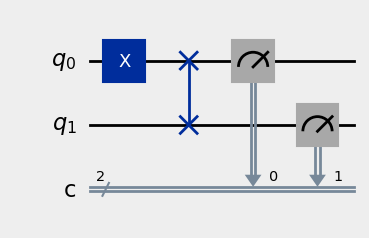

In [8]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram, circuit_drawer

# Criando um circuito com 2 qubits e 2 bits clássicos
qc = QuantumCircuit(2, 2)

# Inicializa o qubit 0 no estado |1⟩
qc.x(0)

# Aplica a porta SWAP entre os qubits 0 e 1
qc.swap(0, 1)

# Mede todos os qubits automaticamente
qc.measure(0,0)
qc.measure(1,1)

# Simulando com 1000 shots
backend = BasicProvider().get_backend("basic_simulator")
result = backend.run(qc, shots=1000).result()
counts = result.get_counts()

# Exibindo os resultados
print(counts)
circuit_drawer(qc, output="mpl", style={"backgroundcolor": "#EEEEEE"})

# Qiskit exibe os resultados no formato 'qubit_1qubit_0' (ou seja, o bit clássico de índice mais alto aparece primeiro na string)

## Solução 10 
Crie um Circuito e Implemente a porta Toffoli​

{'111': 1000}


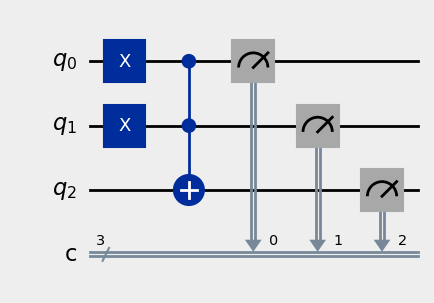

In [9]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram, circuit_drawer

# Circuito com 3 qubits e 3 bits clássicos
qc = QuantumCircuit(3, 3)

# Inicializando os qubits de controle no estado |1⟩
qc.x(0)  # Primeiro controle
qc.x(1)  # Segundo controle
# Qubit 2 (alvo) permanece em |0⟩

# Aplica porta Toffoli: controles = qubits 0 e 1, alvo = qubit 2
qc.ccx(0, 1, 2)

# Mede os qubits individualmente
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

# Simulação
backend = BasicProvider().get_backend("basic_simulator")
result = backend.run(qc, shots=1000).result()
counts = result.get_counts()

# Exibe os resultados
print(counts)  # Esperado: '111'
circuit_drawer(qc, output="mpl", style={"backgroundcolor": "#EEEEEE"})


### Algoritmo de Deustch

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator


def deutsch_function(case: int):
    # Essa função gera um circuito quântico para um dos quatro casos possíveis.
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

In [ ]:
for i in range(1, 5):
    qc = deutsch_function(i)
    print(f"Circuito para o caso {i}:")
    display(qc.draw(output="mpl", style={"backgroundcolor": "#EEEEEE"}))

In [ ]:
def compile_circuit(function: QuantumCircuit):
    # Compilando o circuito do algoritmo de Deustch.

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

In [ ]:
display(compile_circuit(deutsch_function(3)).draw(output="mpl", style={"backgroundcolor": "#EEEEEE"}))

In [ ]:
def deutsch_algorithm(function: QuantumCircuit):
    # Determina se a função é constante ou balanceada.

    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constante"
    return "balanceada"

In [ ]:
for i in range(1,5):
    print(f"Caso {i}:")
    f = deutsch_function(i)
    display(deutsch_algorithm(f))

referência: https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms